In [6]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from warnings import filterwarnings
filterwarnings('ignore')

### Lojistik Regresyon
#### Model

In [9]:
diabetes = pd.read_csv("diabetes.csv")
df = diabetes.copy()
df = df.dropna()
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 60.0 KB


In [11]:
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

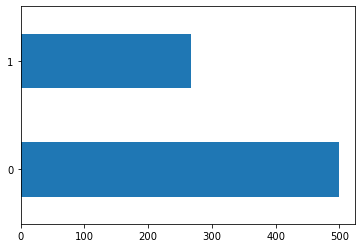

In [12]:
df["Outcome"].value_counts().plot.barh();

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [14]:
y = df["Outcome"]
X = df.drop(["Outcome"],axis = 1)

##### stats model

In [16]:
loj = sm.Logit(y,X)
loj_model = loj.fit()
loj_model.summary()
# R2 değeri, modelin açıklanabilirlilik oranıdır.

Optimization terminated successfully.
         Current function value: 0.608498
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      760
Method:                           MLE   Df Model:                            7
Date:                Wed, 10 Aug 2022   Pseudo R-squ.:                 0.05922
Time:                        12:42:21   Log-Likelihood:                -467.33
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 2.583e-10
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Pregnancies                  0.1284      0.029      4.484      0.000       0.072       0.185
Glucose                      0.0129      0.003      4.757      0.000       0.008       0.018
BloodPressure               -0.0303      0.005     -6.481      0.000      -0.039      -0.021
SkinThickness                0.0002      0.006      0.032      0.974      -0.012       0.012
Insulin                      0.0007      0.001      0.942      0.346      -0.001       0.002
BMI                         -0.0048      0.011     -0.449      0.653      -0.026       0.016
DiabetesPedigreeFunction     0.3203      0.240      1.335      0.182      -0.150       0.790
Age                         -0.0156      0.008     -1.852      0.064      -0.032       0.001
============================================================================================
"""

##### scikit-learn model

In [17]:
from sklearn.linear_model import LogisticRegression
loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(X,y)
loj_model

LogisticRegression(solver='liblinear')

In [18]:
loj_model.intercept_

array([-5.89179252])

In [20]:
loj_model.coef_

# butun bagımsız degiskenlerin katsayı degerleridir.

array([[ 1.17053685e-01,  2.83878895e-02, -1.68894719e-02,
         7.55279538e-04, -6.42784843e-04,  5.97636520e-02,
         6.77637727e-01,  7.24001412e-03]])

#### Tahmin & Model Tuning

In [21]:
y_pred = loj_model.predict(X)

In [22]:
confusion_matrix(y,y_pred)

array([[448,  52],
       [121, 147]], dtype=int64)

In [23]:
accuracy_score(y,y_pred)

0.7747395833333334

In [24]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       500
           1       0.74      0.55      0.63       268

    accuracy                           0.77       768
   macro avg       0.76      0.72      0.73       768
weighted avg       0.77      0.77      0.77       768



In [30]:
loj_model.predict(X)[0:10]

array([1, 0, 1, 0, 1, 0, 0, 1, 1, 0], dtype=int64)

sadece olasılık değerlerini görmek için, 1 ve 0 olmadan :
bunun istenme sebebi: kendimiz eşik değeri belirleyip o şekilde ilerlemek isteyebiliriz.

######  predict_proba fonksiyonu ikili çıktı üretir. 0.indexinde yer alan 0 sınıfına ait olasılıktır.
###### ilk sutun, 0.indexe ait olasılıkları verir, ilk sınıfa dair olasılık değerlerini verir.

In [32]:
loj_model.predict_proba(X)[0:10]

array([[0.35040299, 0.64959701],
       [0.91702275, 0.08297725],
       [0.22474238, 0.77525762],
       [0.92139168, 0.07860832],
       [0.16723028, 0.83276972],
       [0.79899015, 0.20100985],
       [0.880195  , 0.119805  ],
       [0.27812679, 0.72187321],
       [0.32060337, 0.67939663],
       [0.92273446, 0.07726554]])

In [33]:
y_probs = loj_model.predict_proba(X)
y_probs = y_probs[:,1]

In [35]:
y_probs[0:10]

array([0.64959701, 0.08297725, 0.77525762, 0.07860832, 0.83276972,
       0.20100985, 0.119805  , 0.72187321, 0.67939663, 0.07726554])

In [38]:
y_pred = [1 if i > 0.5 else 0 for i in y_probs ]

# 0.5 şeklinde eşik değeri belirledik. Farklı dönüşümler de yapılabilirdi.

In [37]:
y_pred[0:10]

[1, 0, 1, 0, 1, 0, 0, 1, 1, 0]

In [39]:
confusion_matrix(y,y_pred)

array([[448,  52],
       [121, 147]], dtype=int64)

In [40]:
accuracy_score(y,y_pred)

0.7747395833333334

In [41]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       500
           1       0.74      0.55      0.63       268

    accuracy                           0.77       768
   macro avg       0.76      0.72      0.73       768
weighted avg       0.77      0.77      0.77       768



### roc egrisi

Kırmızı olan egri, hiçbir modelleme yapmadan elde edeceğimiz basarıdır. Bütün degerleri rastgele 0,1 atadığımızda elde edecegimiz egridir. 
Amacımız bu egriden ne kadar farklı bir basarı elde ediyoruz durumudur.

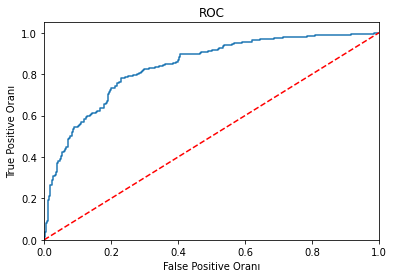

In [42]:
logit_roc_auc = roc_auc_score(y, loj_model.predict(X))

fpr, tpr, thresholds = roc_curve(y, loj_model.predict_proba(X)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('ROC')
plt.show()

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.30, 
                                                    random_state = 42)

In [44]:
loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(X_train,y_train)
loj_model

LogisticRegression(solver='liblinear')

In [45]:
accuracy_score(y_test, loj_model.predict(X_test))

0.7532467532467533

biraz once split etmeden elde ettigimiz score ile karsılastırıyoruz.

In [46]:
cross_val_score(loj_model, X_test, y_test, cv = 10).mean()

0.7704710144927536

In [48]:
cross_val_score(loj_model,X_test,y_test,cv=10).mean()

0.7704710144927536